# Atomic Spectra

###### Nathaniel Flower

## Abstract

In this lab I used elemental spectra to identify an unknown element after practicing on helium and hydrogen. I discovered that the unknown I was given was argon.

## Introduction

<p>
It has been known since Isaac Newton that light can be 'split' into different colors. Newton would use a prism to split white light into all the colors of the rainbow. Later it was discovered that the split white light extended outside of the visible spectrum into ultraviolet and infrared.
</p>
<p>
Joseph Fraunhofer discovered in 1814 that when the sun's light was dispersed enough that he began to see dark lines. He further discovered that the locations of these lines were always the same. He needed to standardize the way the light was dispersed and there is too much variation in prisms. He invented the defraction grating to help standardize the measurements and allow them to be more easily compared.
</p>
<p>
Many physicists and chemists began to observe that different sources of light defracted into different patterns. Kirchhoff formed a law that states that any source will emmit or absorb only certain types of light. This law is the foundation of this lab because we will be using the light emmitted from different sources as a type of fingerprint to establish what element we were observing.
</p>

## Procedure

<p>
I started this experiment by trying to figure out how to use the defraction aparatus. After fiddling with it a bit, I decided on using the 0 degree mark on the outside spinning plate to measure the angles. With the defraction grating centered on the aparatus, I moved the eye piece to the right until I encountered the first line. Then I recorded that angle and moved the eye piece to the left until I saw the same color line on the other side. I recorded the second angle as well and then moved to the next color line.
</p>
<p>
The first element I analyzed was helium. It gave off a purplish glow. There were 6 measurable lines. On the left side there was an extra violet line but it was faint and did not appear on the right side. The colors of the lines in order from inward to outward were: violet, blue, green, a second green, yellow, and red.
</p>
<div>
<img src='./assets/he_4.jpg' width="250">
<span><strong>Figure 1: Helium Tube</strong></span>
</div>
<br>
<div>
<img src='./assets/he_2.jpg' width="250">
<span><strong>Figure 2: Helium Spectrum</strong></span>
</div>
<br>
<p>
The second element I tested was hydrogen. This one was weird. The lines were very blurry. At first I thought it was the tube malfunctioning. I took another group's hydrogen tube to check if it was my tube or not. The new tube had the same malfunction. I tried replacing the defraction grating as well but that failed to correct the problem. At that point it became clear that the problem was a bit esoteric and I decided I would just use the two discernible lines.
</p>
<div>
<img src='./assets/h_1.jpg' width="250">
<span><strong>Figure 1: Hydrogen Tube</strong></span>
</div>
<br>
<div>
<img src='./assets/h_2.jpg' width="250">
<span><strong>Figure 2: Hydrogen Spectrum</strong></span>
</div>
<br>
<p>
The final element is unknown.
</p>
<div>
<img src='./assets/u_1.jpg' width="250">
<span><strong>Figure 1: Unknown Tube</strong></span>
</div>
<br>
<div>
<img src='./assets/u_2.jpg' width="250">
<span><strong>Figure 2: Unknown Spectrum</strong></span>
</div>

## Data and Calculations

he qualatative|he wavelength (nm)|h qualatative|h wavelength (nm)|u qualatative|u wavelength (nm)
-------|-------------|------|-------------|----------|-------------
violet|439.262128145|blue|482.683100897|violet|427.298875118
blue|468.713403898|red|647.822706347|blue-green|480.589963715
green|484.914868862|--|--|orange|595.752458864
green|354.47912792|--|--|red|651.179238606
yellow|581.432289717|--|--|--|--
red|662.568169428|--|--|--|--

<p>
Since I measured from one defracted line to the other on the other side, the true angle is one half of the measured angle.
</p>
<p>
We also need to use the Bragg Equation given as:
\begin{equation}
2d\sin{\theta}=n\lambda
\end{equation}
For our purposes, n=1. The tricky part is that I plugged in 600 lines/mm for d but I was getting the wrong answer. Chelsey informed me that I should be using 1.67x10^-6. I asked her why and she told me that she didn't know but Brittany and Hope said to use it and it works. So, in a blatent kind of deus ex machina, substitute 1.67x10^-6 for 2*d to get the final equation:
\begin{equation}
\lambda = 1.67*10^-6 \sin{\theta}
\end{equation}
</p>

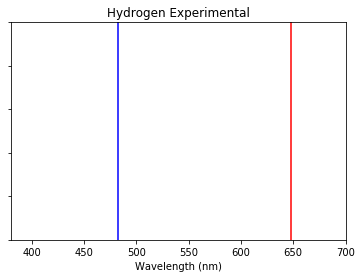

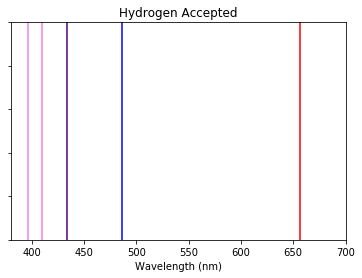

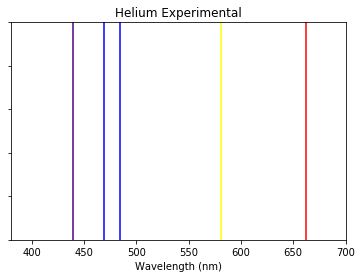

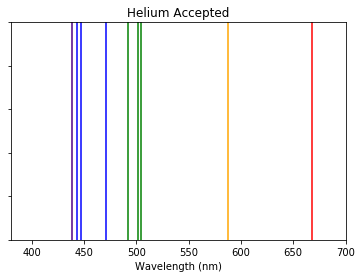

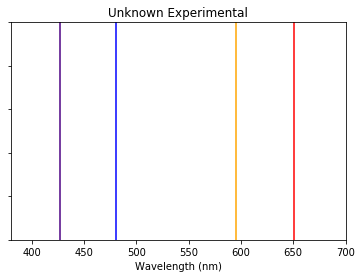

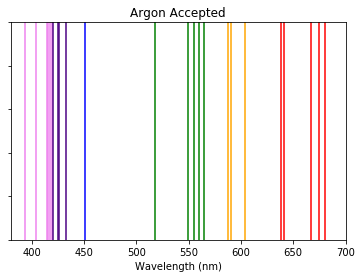

In [2]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import math

def get_color(wavelen):
    if wavelen < 390 or wavelen > 700:
        return 'white'
    if wavelen < 420:
        return 'violet'
    if wavelen < 440:
        return 'indigo'
    if wavelen < 490:
        return 'blue'
    if wavelen < 570:
        return 'green'
    if wavelen < 585:
        return 'yellow'
    if wavelen < 620:
        return 'orange'
    if wavelen < 780:
        return 'red'

np.warnings.filterwarnings('ignore')

data = ascii.read("assets/data_nf.csv")

data['he'] = -(data['he1'] - data['he2']) / 2
data['h'] = -(data['h1'] - data['h2']) / 2
data['u'] = -(data['u1'] - data['u2']) / 2
data['he'] = 1.67e-6*np.sin(np.radians(data['he']))/1e-9
data['h'] = 1.67e-6*np.sin(np.radians(data['h']))/1e-9
data['u'] = 1.67e-6*np.sin(np.radians(data['u']))/1e-9

plt.figure(0)
plt.title("Hydrogen Experimental")
for i in data['h']:
    plt.axvline(x=i, color=get_color(i))

plt.figure(1)
plt.title("Hydrogen Accepted")
for i in [656.3, 486.1, 434.0, 410.2, 397.0]:
    plt.axvline(x=i, color=get_color(i))
    
plt.figure(2)
plt.title("Helium Experimental")
for j in data['he']:
    plt.axvline(x=j, color=get_color(j))
    
plt.figure(3)
plt.title("Helium Accepted")
for j in [438.793, 443.755, 447.148, 471.314, 492.193, 501.567, 504.774, 587.562, 667.815]:
    plt.axvline(x=j, color=get_color(j))


plt.figure(4)
plt.title("Unknown Experimental")
for k in data['u']:
    plt.axvline(x=k, color=get_color(k))
    
plt.figure(5)
plt.title("Argon Accepted")
for k in [377, 394, 404, 415, 416, 418, 419, 420, 425, 426, 433, 451, 518, 
         549, 555, 560, 565, 588, 591, 604, 638, 641, 667, 675, 680]:
    plt.axvline(x=k, color=get_color(k))

for i in range(6):
    plt.figure(i)
    axes = plt.gca()
    axes.set_xlim([380,700])
    plt.xlabel("Wavelength (nm)")
    axes.set_yticklabels([])
    #axes.invert_xaxis()
    

plt.show()

<p>
From the spectrum above, it appears that the unknown element was argon.
</p>

## Conclusion

<p>
I found that the unknown element was argon. The blue line from the experimental spectra does make me somewhat unconfident in my answer since it exists in a large gap of argon's spectra. However, I had been struggling with extra lines the whole experiment and that leads me to believe that the blue line is likely an anomaly introduced by the equipment.
</p>
<p>
The uncertainty in my measurements is also negligible because of the way I did my analysis. Instead of trying to match up the values of wavelengths directly, I plotted them and compared visually. The brain is great at pattern recognition so any small deviations from uncertainty would not matter but any large errors (like that blue line in the argon spectra) would.
</p>

## References

<ul>
<li>Chelsey McMichael</li>
<li>NIST Atomic Spectra Database</li>
<li>http://web.mit.edu/spectroscopy/history/history-classical.html</li>
</ul>
<p>
Special shout out to Liam. Your bullying and rude comments about my attempted graphs pushed me to discover how to color them. I appreciate you being unwilling to let me be better than you and insist that I am much better than you. You're sacrifice and humility is the stuff of legends.
</p>